In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi Spark Session
spark = SparkSession.builder.appName("CabaiAnalysis").getOrCreate()

# Membaca dataset
file_path = "dataset-cabe.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [8]:
from pyspark.sql import functions as F  # Tambahkan baris ini
from pyspark.sql.functions import col  # Tambahkan baris ini

# Menghitung rata-rata harga per pasar
average_prices = df.groupBy("Pasar").agg(
    *[F.mean(col("Tanggal-{}".format(day))).alias(f"Tanggal-{day}") for day in range(1, 32)]
)

# Mengumpulkan hasil analisis ke dalam list
output_text = []
for idx, row in enumerate(average_prices.collect(), start=1):
    pasar = row["Pasar"]
    rata_rata_harga = int(sum([row[f"Tanggal-{day}"] for day in range(1, 32)]) / 31)  # Menghitung rata-rata dan mengonversi ke integer
    output_text.append(f"{idx}. {pasar}: {rata_rata_harga:}")

# Menampilkan hasil analisis dalam bentuk teks
print("Rata-Rata Harga Cabai per Pasar (Desember 2023):")
print("\n".join(output_text))


Rata-Rata Harga Cabai per Pasar (Desember 2023):
1. Pasar Baru Metro Atom: 101301
2. Pasar Pulo Gadung: 102251
3. Pasar Gondangdia: 103422
4. Pasar Senen Blok III - VI: 100447
5. Pasar Tebet Barat: 103442
6. Pasar Koja Baru: 101467
7. Pasar Jatinegara: 96612
8. Pasar Jembatan Lima: 85452
9. Pasar Grogol: 92694
10. Pasar Induk Kramat Jati: 72346
11. Pasar Kalideres: 90172
12. Pasar Pesanggrahan: 98548
13. Pasar Perumnas Klender: 100403
14. Pasar Kelapa Gading: 99992
15. Pasar Ciplak: 98695
16. Pasar Kebayoran Lama: 97895
17. Pasar Pademangan Timur: 87903
18. Pasar Glodok: 102258
19. Pasar Mampang Prapatan: 97338
20. Pasar Pramuka: 98697
21. Pasar Rawamangun: 107419
22. Pasar Anyer Bahari: 106886
23. Pasar Rawa Badak: 111154
24. Pasar Tomang Barat: 109610
25. Pasar Cijantung: 93225
26. Pasar Cempaka Putih: 95075
27. Pasar Petojo Ilir: 94516
28. Pasar Sunter Podomoro: 105686
29. Pasar Cipete: 95483
30. Pasar Paseban: 102580
31. Pasar Minggu: 92217
32. Pasar Jembatan Merah: 103704
33. Pasa

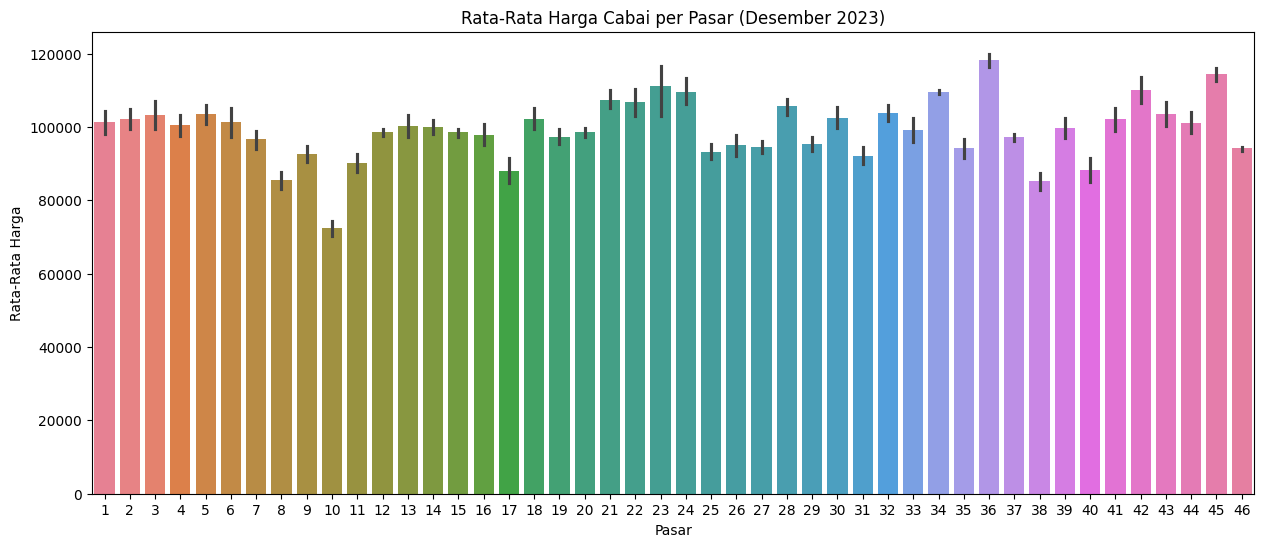

In [9]:
from pyspark.sql import functions as F  # Tambahkan baris ini
from pyspark.sql.functions import col  # Tambahkan baris ini

# Menghitung rata-rata harga per pasar
average_prices = df.groupBy("Pasar").agg(
    *[F.mean(col("Tanggal-{}".format(day))).alias(f"Tanggal-{day}") for day in range(1, 32)]
)

# Mengganti nama pasar dengan nomor dimulai dari 1 hingga 46
average_prices = average_prices.withColumn("Pasar", (F.monotonically_increasing_id() % 46) + 1)

# Visualisasi Rata-Rata Harga per Pasar
average_prices_pd = average_prices.toPandas()
plt.figure(figsize=(15, 6))
sns.barplot(data=average_prices_pd.set_index('Pasar').T)
plt.title('Rata-Rata Harga Cabai per Pasar (Desember 2023)')
plt.xlabel('Pasar')
plt.ylabel('Rata-Rata Harga')
plt.show()

In [6]:
from pyspark.sql import functions as F

# Mengurutkan DataFrame berdasarkan kolom rata-rata harga secara descending
sorted_prices_desc = average_prices.sort(F.desc("RataRataHarga"))

# Menampilkan hasil analisis urutan pasar dengan harga termahal dalam bentuk list
output_text_desc = []
for idx, row in enumerate(sorted_prices_desc.collect(), start=1):
    pasar = row["Pasar"]
    rata_rata_harga = int(row["RataRataHarga"])
    output_text_desc.append(f"{idx}. {pasar}: {rata_rata_harga}")

# Menampilkan hasil dalam bentuk list
print("Urutan Pasar dengan Harga Termahal (Desember 2023):")
print("\n".join(output_text_desc))


Urutan Pasar dengan Harga Termahal (Desember 2023):
1. Pasar Mayestik: 118387
2. Pasar Tanah Abang Blok A-G: 114354
3. Pasar Rawa Badak: 111154
4. Pasar Pos Pengumben: 110049
5. Pasar Pluit: 109646
6. Pasar Tomang Barat: 109610
7. Pasar Rawamangun: 107419
8. Pasar Anyer Bahari: 106886
9. Pasar Sunter Podomoro: 105686
10. Pasar Jembatan Merah: 103704
11. Pasar Pal Merah: 103605
12. Pasar Tebet Barat: 103442
13. Pasar Gondangdia: 103422
14. Pasar Paseban: 102580
15. Pasar Glodok: 102258
16. Pasar Pulo Gadung: 102251
17. Pasar Lenteng Agung: 102201
18. Pasar Koja Baru: 101467
19. Pasar Baru Metro Atom: 101301
20. Pasar Kalibaru: 101214
21. Pasar Senen Blok III - VI: 100447
22. Pasar Perumnas Klender: 100403
23. Pasar Kelapa Gading: 99992
24. Pasar Kramat Jati: 99677
25. Pasar Rumput: 99193
26. Pasar Pramuka: 98697
27. Pasar Ciplak: 98695
28. Pasar Pesanggrahan: 98548
29. Pasar Kebayoran Lama: 97895
30. Pasar Mampang Prapatan: 97338
31. Pasar Cengkareng: 97246
32. Pasar Jatinegara: 96612
3

In [7]:
from pyspark.sql import functions as F

# Menghitung rata-rata harga per pasar (jika belum dihitung sebelumnya)
average_prices = df.groupBy("Pasar").agg(
    *[F.mean(F.col("Tanggal-{}".format(day))).alias(f"Tanggal-{day}") for day in range(1, 32)]
)

# Menambahkan kolom baru untuk rata-rata harga
average_prices = average_prices.withColumn("RataRataHarga", sum(average_prices[f"Tanggal-{day}"] for day in range(1, 32)) / 31)

# Mengurutkan DataFrame berdasarkan kolom rata-rata harga secara ascending
sorted_prices = average_prices.sort(F.asc("RataRataHarga"))

# Menampilkan hasil analisis urutan pasar dengan harga termurah dalam bentuk list
output_text = []
for idx, row in enumerate(sorted_prices.collect(), start=1):
    pasar = row["Pasar"]
    rata_rata_harga = int(row["RataRataHarga"])
    output_text.append(f"{idx}. {pasar}: {rata_rata_harga}")

# Menampilkan hasil dalam bentuk list
print("Urutan Pasar dengan Harga Termurah (Desember 2023):")
print("\n".join(output_text))


Urutan Pasar dengan Harga Termurah (Desember 2023):
1. Pasar Induk Kramat Jati: 72346
2. Pasar Johar Baru: 85241
3. Pasar Jembatan Lima: 85452
4. Pasar Pademangan Timur: 87903
5. Pasar Pal Meriam: 88374
6. Pasar Kalideres: 90172
7. Pasar Minggu: 92217
8. Pasar Grogol: 92694
9. Pasar Cijantung: 93225
10. Pasar Klender SS: 94193
11. Pasar Ujung Menteng: 94215
12. Pasar Petojo Ilir: 94516
13. Pasar Cempaka Putih: 95075
14. Pasar Cipete: 95483
15. Pasar Jatinegara: 96612
16. Pasar Cengkareng: 97246
17. Pasar Mampang Prapatan: 97338
18. Pasar Kebayoran Lama: 97895
19. Pasar Pesanggrahan: 98548
20. Pasar Ciplak: 98695
21. Pasar Pramuka: 98697
22. Pasar Rumput: 99193
23. Pasar Kramat Jati: 99677
24. Pasar Kelapa Gading: 99992
25. Pasar Perumnas Klender: 100403
26. Pasar Senen Blok III - VI: 100447
27. Pasar Kalibaru: 101214
28. Pasar Baru Metro Atom: 101301
29. Pasar Koja Baru: 101467
30. Pasar Lenteng Agung: 102201
31. Pasar Pulo Gadung: 102251
32. Pasar Glodok: 102258
33. Pasar Paseban: 102